# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import scipy
import sklearn
import os

# Importing Dataset

In [2]:
df = pd.read_csv('segmentation_data.csv', index_col='ID')

# Analysing Dataset

In [3]:
df.head(10)

,Sex,MaritalStatus,Age,Education,Income,Occupation,SettlementSize
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
100000006,0,0,35,1,144848,0,0
100000007,0,0,53,1,156495,1,1
100000008,0,0,35,1,193621,2,1
100000009,0,1,61,2,151591,0,0


In [4]:
df.tail()

,Sex,MaritalStatus,Age,Education,Income,Occupation,SettlementSize
ID,,,,,,,
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0
100001999,1,1,24,1,97968,0,0
100002000,0,0,25,0,68416,0,0


In [5]:
# Number of rows and columns as (records, features) where records are rows and features are columns.
df.shape

(2000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             2000 non-null   int64
 1   MaritalStatus   2000 non-null   int64
 2   Age             2000 non-null   int64
 3   Education       2000 non-null   int64
 4   Income          2000 non-null   int64
 5   Occupation      2000 non-null   int64
 6   SettlementSize  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [7]:
# It gives statical analysis.
df.describe()

,Sex,MaritalStatus,Age,Education,Income,Occupation,SettlementSize
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Handling Missing Values

In [8]:
df.isnull().sum()

Sex               0
MaritalStatus     0
Age               0
Education         0
Income            0
Occupation        0
SettlementSize    0
dtype: int64

In [9]:
df.Occupation.value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

In [10]:
df.Education.value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [11]:
df['SettlementSize'].value_counts()

0    989
1    544
2    467
Name: SettlementSize, dtype: int64

In [12]:
# It gives the column name.
df.columns

Index(['Sex', 'MaritalStatus', 'Age', 'Education', 'Income', 'Occupation',
       'SettlementSize'],
      dtype='object')

# Data Visualization

In [13]:
df.corr()

,Sex,MaritalStatus,Age,Education,Income,Occupation,SettlementSize
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
MaritalStatus,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
SettlementSize,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


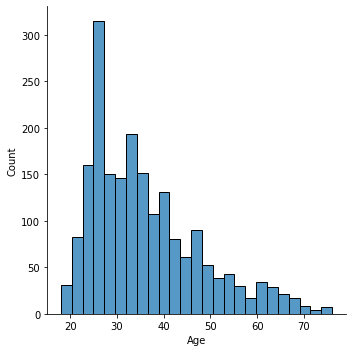

In [14]:
sns.displot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SettlementSize'>

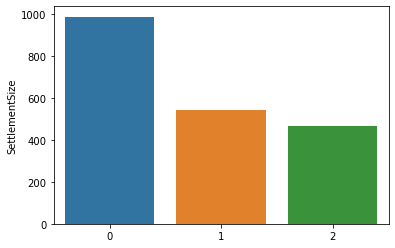

In [15]:
sns.barplot((df.SettlementSize.value_counts()).index,df.SettlementSize.value_counts())

<AxesSubplot:xlabel='Age', ylabel='Income'>

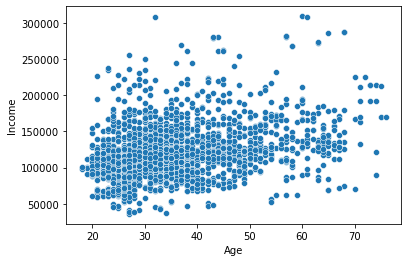

In [16]:
sns.scatterplot(x=df.Age,y=df.Income)

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'SettlementSize'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

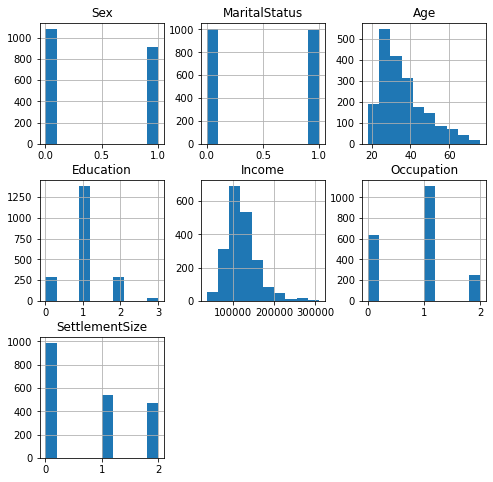

In [17]:
df.hist(figsize=(8,8))

<AxesSubplot:>

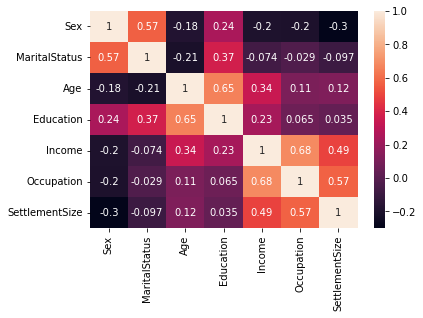

In [18]:
sns.heatmap(df.corr(),annot=True)

In [25]:
names = df.columns

# Feature Scaling

In [26]:
from sklearn import preprocessing
df = preprocessing.minmax_scale(df, feature_range = (0,1))

In [27]:
df = pd.DataFrame(df, columns = names)

In [28]:
df.head()

,Sex,MaritalStatus,Age,Education,Income,Occupation,SettlementSize
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


# Unsupervised Model Building

# Importing and Initializing the Model

In [29]:
from sklearn.cluster import KMeans
from scipy import spatial

In [30]:
wscc = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wscc.append(kmeans.inertia_)

In [31]:
import matplotlib as plt

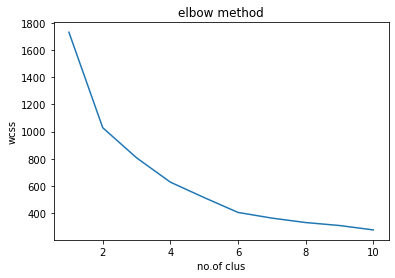

In [32]:
plt.pyplot.plot(range(1,11),wscc)
plt.pyplot.title('elbow method')
plt.pyplot.xlabel('no.of clus')
plt.pyplot.ylabel('wcss')
plt.pyplot.show()

In [33]:
km_model =KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

In [36]:
ykmeans=km_model.fit_predict(df)

In [37]:
df.head()

,Sex,MaritalStatus,Age,Education,Income,Occupation,SettlementSize
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [38]:
df['kclus'] = pd.Series(ykmeans)

In [39]:
df.head(10)

,Sex,MaritalStatus,Age,Education,Income,Occupation,SettlementSize,kclus
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,2
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,1
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,2
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,2
5,0.0,0.0,0.293103,0.333333,0.398549,0.0,0.0,0
6,0.0,0.0,0.603448,0.333333,0.441129,0.5,0.5,2
7,0.0,0.0,0.293103,0.333333,0.576858,1.0,0.5,2
8,0.0,1.0,0.741379,0.666667,0.423201,0.0,0.0,0
9,0.0,1.0,0.172414,0.333333,0.507487,1.0,0.0,2


# Splitting the Dataset into Dependent and Independent Variables

In [40]:
y = df['kclus']
x = df.drop(columns = ['kclus'], axis = 1)

# Splitting the data into train and test

In [42]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# Supervised Model Building

# Training and Testing the Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost

In [46]:
rand_model = RandomForestClassifier()
tree_model = tree.DecisionTreeClassifier()
xgb_model = xgboost.XGBClassifier()

In [47]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

# Model Evaluation

In [48]:
pred=rand_model.predict(x_train)
pred1=tree_model.predict(x_train)
pred2=xgb_model.predict(x_train)

In [49]:
from sklearn import metrics

In [50]:
print(metrics.accuracy_score(pred,y_train))
print(metrics.accuracy_score(pred1,y_train))
print(metrics.accuracy_score(pred2,y_train))

1.0
1.0
1.0


In [51]:
pred=rand_model.predict(x_test)
pred1=tree_model.predict(x_test)
pred2=xgb_model.predict(x_test)

In [52]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

0.9975
0.9975
0.9975


# Saving the Model

In [53]:
import pickle

In [54]:
pickle.dump(xgb_model,open("cust_xgbmodel.pkl",'wb'))